In [12]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.DataFrame()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
dataset_BMKG = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BMKG/BMKG.csv",index_col='Bulan')
print(dataset_BMKG.shape)
dataset_BMKG.head(72)

(72, 6)


,Tn,Tx,Tavg,RH_avg,RR,ss
Bulan,,,,,,
15-Jan,25.24,30.65,27.34,81.42,16.72,3.63
15-Feb,24.81,29.83,27.04,83.61,32.27,4.13
15-Mar,25.52,31.26,28.16,78.37,9.27,5.24
15-Apr,26.31,32.14,28.71,77.10,4.20,5.58
15-May,26.47,32.73,29.19,72.48,2.78,7.09
...,...,...,...,...,...,...
20-Aug,26.46,32.65,29.01,73.87,4.87,7.75
20-Sep,27.19,32.98,29.48,72.12,0.55,7.51
20-Oct,26.09,32.59,29.01,76.00,4.92,6.75


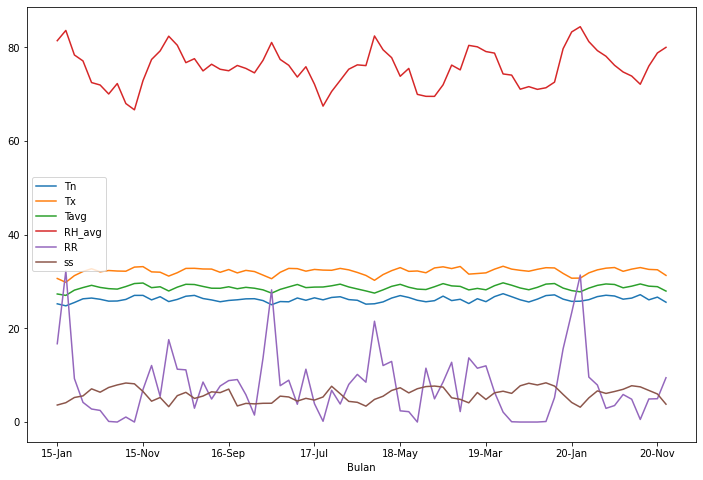

In [66]:
# df.columns = ['BMKG']
dataset_BMKG.plot(figsize=(12,8))

In [32]:
tx_data = dataset_BMKG.drop(columns=['Tn','Tavg','RH_avg','RR','ss'])
tx_data

,Tx
Bulan,
15-Jan,30.65
15-Feb,29.83
15-Mar,31.26
15-Apr,32.14
15-May,32.73
...,...
20-Aug,32.65
20-Sep,32.98
20-Oct,32.59


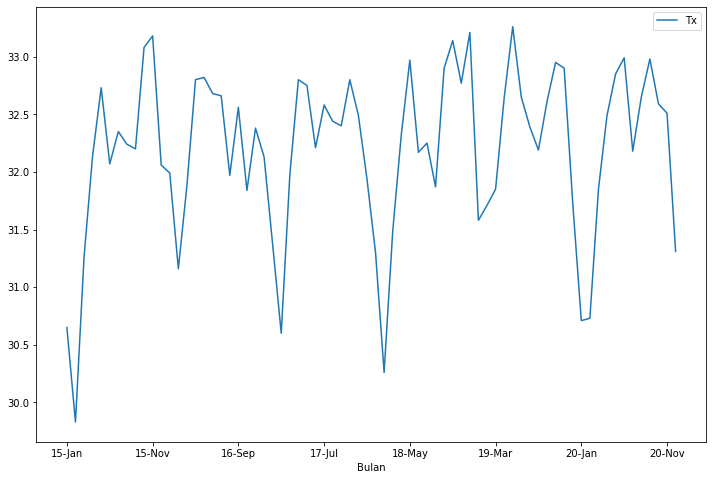

In [33]:
# df.columns = ['BMKG']
tx_data.plot(figsize=(12,8))

In [34]:
tx_data['1b']=tx_data['Tx'].shift(+1)
tx_data['2b']=tx_data['Tx'].shift(+2)
tx_data['3b']=tx_data['Tx'].shift(+3)
tx_data

,Tx,1b,2b,3b
Bulan,,,,
15-Jan,30.65,NaN,NaN,NaN
15-Feb,29.83,30.65,NaN,NaN
15-Mar,31.26,29.83,30.65,NaN
15-Apr,32.14,31.26,29.83,30.65
15-May,32.73,32.14,31.26,29.83
...,...,...,...,...
20-Aug,32.65,32.18,32.99,32.85
20-Sep,32.98,32.65,32.18,32.99
20-Oct,32.59,32.98,32.65,32.18


In [35]:
tx_data=tx_data.dropna()
tx_data

,Tx,1b,2b,3b
Bulan,,,,
15-Apr,32.14,31.26,29.83,30.65
15-May,32.73,32.14,31.26,29.83
15-Jun,32.07,32.73,32.14,31.26
15-Jul,32.35,32.07,32.73,32.14
15-Aug,32.24,32.35,32.07,32.73
...,...,...,...,...
20-Aug,32.65,32.18,32.99,32.85
20-Sep,32.98,32.65,32.18,32.99
20-Oct,32.59,32.98,32.65,32.18


In [38]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
import numpy as np

In [ ]:
# from sklearn.linear_model import LinearRegression
# # lin_model=LinearRegression()

In [39]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)


In [41]:
import numpy as np
x1,x2,x3,y=tx_data['1b'],tx_data['2b'],tx_data['3b'],tx_data['Tx']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[31.26 29.83 30.65]
 [32.14 31.26 29.83]
 [32.73 32.14 31.26]
 [32.07 32.73 32.14]
 [32.35 32.07 32.73]
 [32.24 32.35 32.07]
 [32.2  32.24 32.35]
 [33.08 32.2  32.24]
 [33.18 33.08 32.2 ]
 [32.06 33.18 33.08]
 [31.99 32.06 33.18]
 [31.16 31.99 32.06]
 [31.88 31.16 31.99]
 [32.8  31.88 31.16]
 [32.82 32.8  31.88]
 [32.68 32.82 32.8 ]
 [32.66 32.68 32.82]
 [31.97 32.66 32.68]
 [32.56 31.97 32.66]
 [31.84 32.56 31.97]
 [32.38 31.84 32.56]
 [32.13 32.38 31.84]
 [31.37 32.13 32.38]
 [30.6  31.37 32.13]
 [31.97 30.6  31.37]
 [32.8  31.97 30.6 ]
 [32.75 32.8  31.97]
 [32.21 32.75 32.8 ]
 [32.58 32.21 32.75]
 [32.44 32.58 32.21]
 [32.4  32.44 32.58]
 [32.8  32.4  32.44]
 [32.49 32.8  32.4 ]
 [31.94 32.49 32.8 ]
 [31.3  31.94 32.49]
 [30.26 31.3  31.94]
 [31.48 30.26 31.3 ]
 [32.32 31.48 30.26]
 [32.97 32.32 31.48]
 [32.17 32.97 32.32]
 [32.25 32.17 32.97]
 [31.87 32.25 32.17]
 [32.9  31.87 32.25]
 [33.14 32.9  31.87]
 [32.77 33.14 32.9 ]
 [33.21 32.77 33.14]
 [31.58 33.21 32.77]
 [31.71 31.58

In [42]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [43]:
model.fit(X_train,y_train)
ridge_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Ridge()

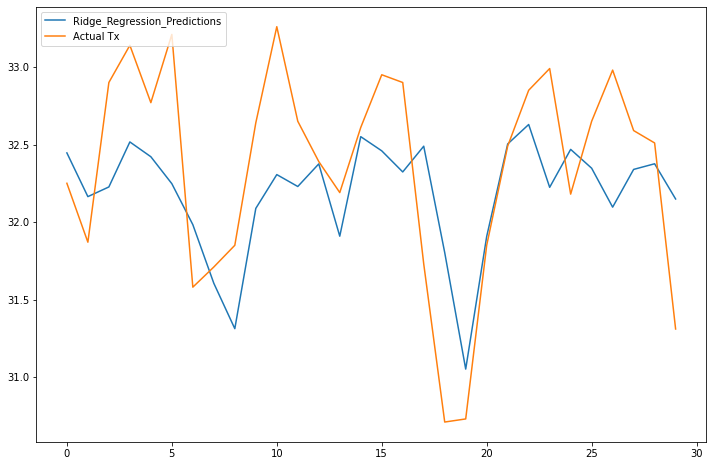

In [51]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Ridge_Regression_Predictions')
plt.plot(y_test,label='Actual Tx')
plt.legend(loc="upper left")
plt.show()

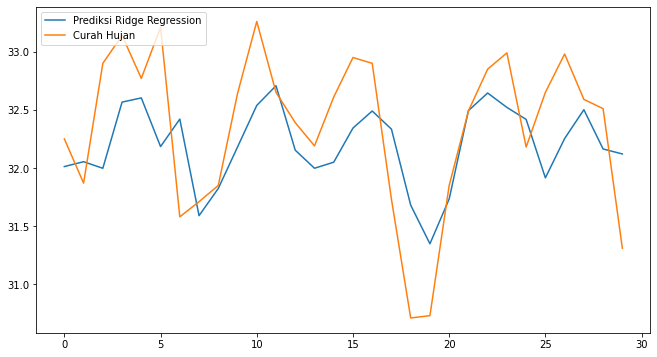

In [50]:
lin_pred=ridge_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Prediksi Ridge Regression')
plt.plot(y_test,label='Curah Hujan')
plt.legend(loc="upper left")
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 0.5410130016921961
Mean Squared Error for Linear Regression Model is: 0.5350904763877016


In [67]:
dataset_DBD = pd.read_csv("/content/drive/My Drive/Colab Notebooks/PENDERITADBD/Penderita.csv")
print(dataset_DBD.shape)
dataset_DBD.head()

(62, 5)


,Tanggal,Kota Administrasi,Kecamatan,PenderitaDBD,JumlahMeninggalDBD
0,15-Jan,Jakarta Utara,Tanjung Priok,9,0
1,15-Feb,Jakarta Utara,Tanjung Priok,14,1
2,15-Mar,Jakarta Utara,Tanjung Priok,14,0
3,15-Apr,Jakarta Utara,Tanjung Priok,24,0
4,15-May,Jakarta Utara,Tanjung Priok,18,0


In [60]:
dataset_DBD = pd.read_csv("/content/drive/My Drive/Colab Notebooks/PENDERITADBD/Penderita.csv")
dataset_DBD.index.freq = 'MS'

In [61]:
df.tail()

,Tanggal,Kota Administrasi,Kecamatan,PenderitaDBD,JumlahMeninggalDBD
57,20-Aug,Jakarta Utara,Tanjung Priok,2,0
58,20-Sep,Jakarta Utara,Tanjung Priok,1,0
59,20-Oct,Jakarta Utara,Tanjung Priok,2,0
60,20-Nov,Jakarta Utara,Tanjung Priok,2,0
61,20-Dec,Jakarta Utara,Tanjung Priok,2,0


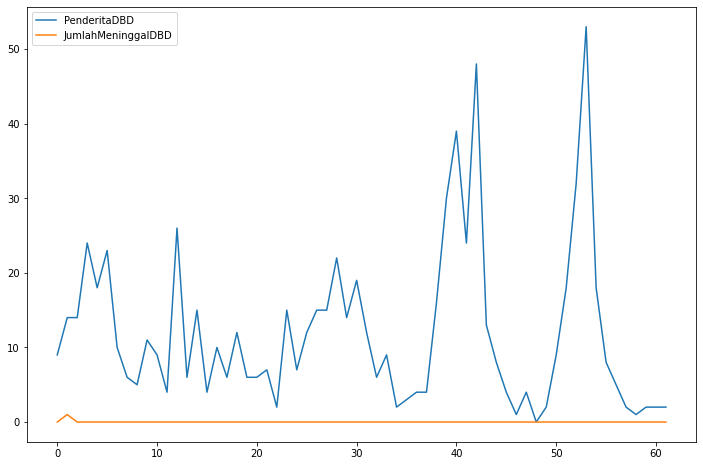

In [70]:
# df.columns = ['PENDERITA DBD']
dataset_DBD.plot(figsize=(12,8))

In [72]:
PenderitaDBD_data = dataset_DBD.drop(columns=['Kota Andministrasi','Kecamatan','JumlahMeninggalDBD'])
PenderitaDBD_data

,Tanggal,Kota Administrasi,Kecamatan,PenderitaDBD
0,15-Jan,Jakarta Utara,Tanjung Priok,9
1,15-Feb,Jakarta Utara,Tanjung Priok,14
2,15-Mar,Jakarta Utara,Tanjung Priok,14
3,15-Apr,Jakarta Utara,Tanjung Priok,24
4,15-May,Jakarta Utara,Tanjung Priok,18
...,...,...,...,...
57,20-Aug,Jakarta Utara,Tanjung Priok,2
58,20-Sep,Jakarta Utara,Tanjung Priok,1
59,20-Oct,Jakarta Utara,Tanjung Priok,2
60,20-Nov,Jakarta Utara,Tanjung Priok,2
